# Describing and analyzing time series

The following requires the **yfinance** library, which is not part of the standard Anaconda installation. You can install it from the command line  (Windows: Anaconda Prompt, macOS: Terminal) using the command

$$\textrm{conda install -c conda-forge yfinance}$$

See further information at [Github Ran Aroussi](https://github.com/ranaroussi/yfinance).

Now we fetch data and describe and analyze time series.

In [1]:
### Bring the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

### For fetching data from Yahoo Finance
import yfinance as yf

### Style affects on layout of graphics
### Available styles can be listed as plt.style.available

sns.set_style('darkgrid')

### Downloading data

We can download Elisa and Telia historical stock prices from the Yahoo Finance service. Stock prices listed in the service can be found using internet searches. For instance, typing "yahoo finance kemira" Kemira Oyj stock prices and its name on the service is found.

In [2]:
### Open the data in the dataframes named correspondingly.

elisa = yf.download('ELISA.HE', start = '2020-1-1', auto_adjust=False)
telia = yf.download('TELIA1.HE', start = '2020-1-1', auto_adjust=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
elisa

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ELISA.HE,ELISA.HE,ELISA.HE,ELISA.HE,ELISA.HE,ELISA.HE
Date,,,,,,
2020-01-02,40.400951,49.279999,49.520000,49.160000,49.250000,194976
2020-01-03,40.810863,49.779999,50.040001,49.290001,49.400002,335732
2020-01-07,40.696091,49.639999,50.299999,49.450001,49.880001,452005
2020-01-08,40.425549,49.310001,49.630001,49.160000,49.500000,365059
2020-01-09,40.728886,49.680000,49.930000,49.419998,49.430000,622106
...,...,...,...,...,...,...
2025-02-24,44.080002,44.080002,44.099998,42.820000,42.880001,309015
2025-02-25,44.160000,44.160000,44.279999,43.840000,44.080002,206274


In [4]:
telia

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TELIA1.HE,TELIA1.HE,TELIA1.HE,TELIA1.HE,TELIA1.HE,TELIA1.HE
Date,,,,,,
2020-01-02,0.063899,3.886,3.902,3.871,3.880,1140539
2020-01-03,0.063801,3.880,3.880,3.842,3.870,1093685
2020-01-07,0.063472,3.860,3.880,3.837,3.869,715962
2020-01-08,0.063176,3.842,3.850,3.818,3.848,818281
2020-01-09,0.063850,3.883,3.908,3.860,3.860,1151012
...,...,...,...,...,...,...
2025-02-24,3.107000,3.107,3.114,3.062,3.062,394918
2025-02-25,3.120000,3.120,3.169,3.116,3.150,940486


### Line charts

Next draw some line charts using the data just fetched. Notice that you always have the most recent data available and therefore also charts.

Text(0, 1, 'Euros')

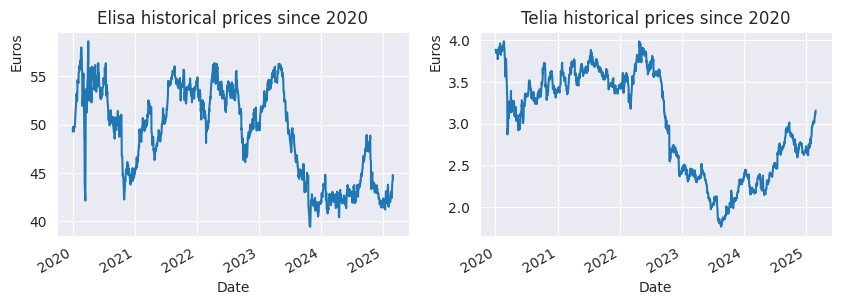

In [5]:
### We plot Elisa's and Telia's historical prices, using daily closing prices.

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
elisa['Close'].plot(ax=axs[0], legend = False)
telia['Close'].plot(ax=axs[1], legend = False)

### Add title and vertical axis-titles

axs[0].set_title('Elisa historical prices since 2020')
axs[1].set_title('Telia historical prices since 2020')

axs[0].set_ylabel('Euros', loc='top')
axs[1].set_ylabel('Euros', loc='top')


Text(0, 1, 'Euros')

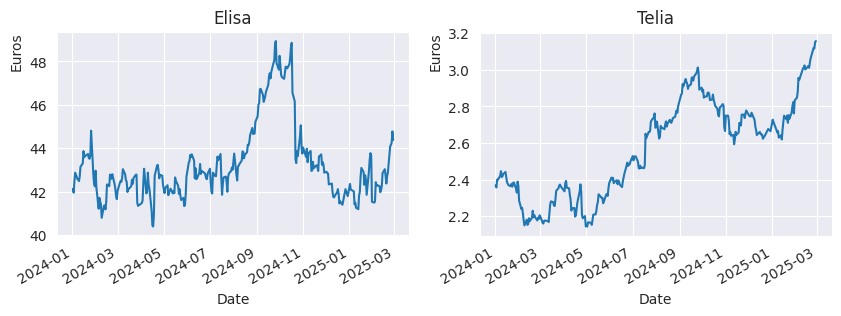

In [6]:
### Plot from the beginning of 2024

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
elisa['Close']['2024':].plot(ax=axs[0], title='Elisa', legend=False)
telia['Close']['2024':].plot(ax=axs[1], title='Telia', legend=False)

### Add axis-titles

axs[0].set_ylabel('Euros', loc='top')
axs[1].set_ylabel('Euros', loc='top')


### Aggregation

We can use **resample()** in order to aggregate a time series from one level to another, e.g. from daily series to monthly series.

Parameters for the function resample() that can be used can be found at:
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In the following there are examples of aggregation. Notice that in all of them the previous data with historical daily stock prices is used.

<ipython-input-7-7cb2fe07456b>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  elisa['Close'].resample('M').mean().plot(ax=axs[0], title = 'Elisa monthly averages', legend = False)
<ipython-input-7-7cb2fe07456b>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  telia['Close'].resample('M').mean().plot(ax=axs[1], title = 'Telia monthly averages', legend = False)


Text(0, 1, 'Euros')

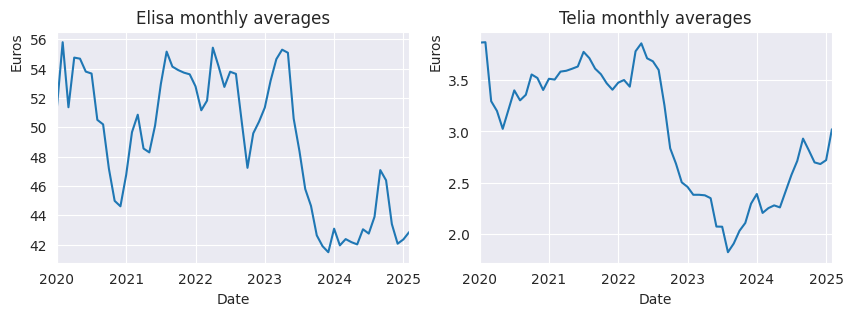

In [7]:
### Calculate monthly average prices using the previous daily data.

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
elisa['Close'].resample('M').mean().plot(ax=axs[0], title = 'Elisa monthly averages', legend = False)
telia['Close'].resample('M').mean().plot(ax=axs[1], title = 'Telia monthly averages', legend = False)

### Add axis-titles

axs[0].set_ylabel('Euros', loc='top')
axs[1].set_ylabel('Euros', loc='top')

<ipython-input-8-a494f1616ff2>:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  elisa['Close'].resample('Q').mean().plot(ax=axs[0], title = 'Elisa quarter annual averages', legend = False)
<ipython-input-8-a494f1616ff2>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  telia['Close'].resample('Q').mean().plot(ax=axs[1], title = 'Telia quarter annual averages', legend = False)


Text(0, 1, 'Euros')

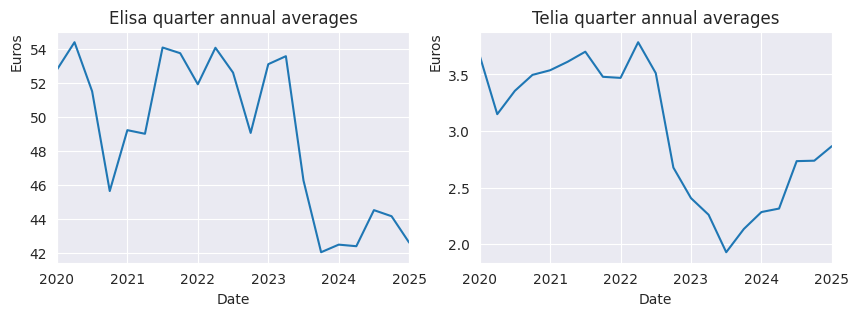

In [8]:
### Quarter annual average prices

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
elisa['Close'].resample('Q').mean().plot(ax=axs[0], title = 'Elisa quarter annual averages', legend = False)
telia['Close'].resample('Q').mean().plot(ax=axs[1], title = 'Telia quarter annual averages', legend = False)

### Add axis-titles

axs[0].set_ylabel('Euros', loc='top')
axs[1].set_ylabel('Euros', loc='top')

<ipython-input-9-9e9c1b13941f>:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  elisa['Close'].resample('Y').mean().plot(ax=axs[0], title = 'Elisa annual averages', legend = False)
<ipython-input-9-9e9c1b13941f>:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  telia['Close'].resample('Y').mean().plot(ax=axs[1], title = 'Telia annual averages', legend = False)


Text(0, 1, 'Euros')

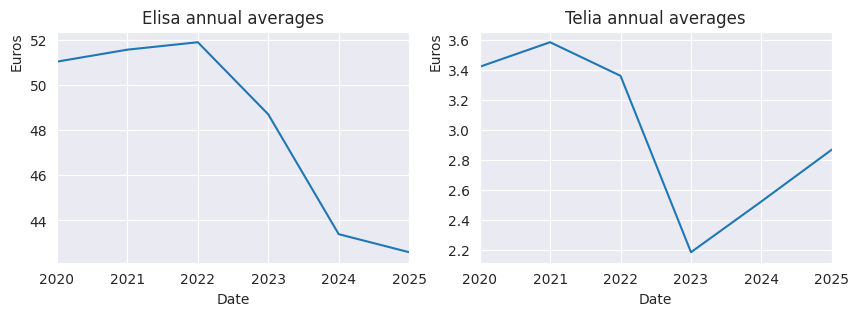

In [9]:
### Annual mean prices

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
elisa['Close'].resample('Y').mean().plot(ax=axs[0], title = 'Elisa annual averages', legend = False)
telia['Close'].resample('Y').mean().plot(ax=axs[1], title = 'Telia annual averages', legend = False)

### Add axis-titles

axs[0].set_ylabel('Euros', loc='top')
axs[1].set_ylabel('Euros', loc='top')

<Axes: title={'center': 'Telia share volume quarter annually'}, xlabel='Date'>

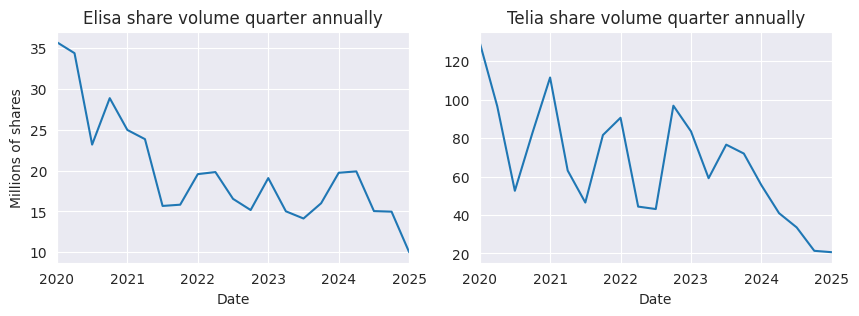

In [10]:
### The number of volume quarter annually (aggregate by addition)
### There may be a sudden drop in the last quarter if the quarter is only beginning

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
(elisa['Volume']/1000000).resample('QE').sum().plot(ax=axs[0], title='Elisa share volume quarter annually', ylabel='Millions of shares', legend=False)
(telia['Volume']/1000000).resample('QE').sum().plot(ax=axs[1], title='Telia share volume quarter annually', legend=False)

# Alternatively
# axs[0].set_ylabel('Millions of shares')

### Moving averages

Moving averages are used to smooth down isolated price spikes.

In stock markets' technical analysis intersection points of time series and their moving averages have <a href="https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp">special interests</a>.

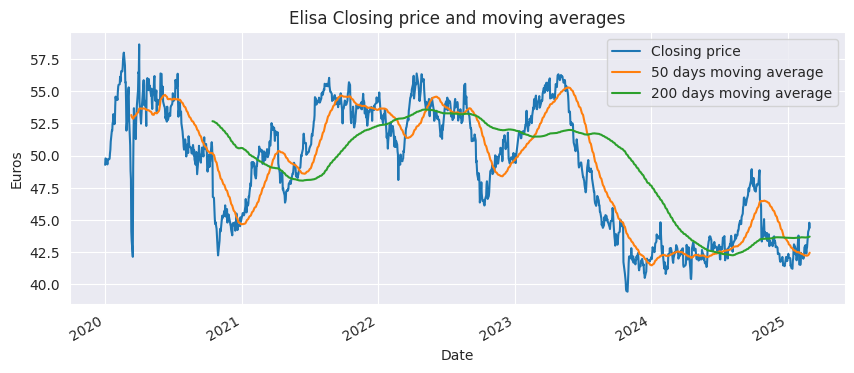

In [11]:
### Consider Elisa's stock markets and daily closing values

ax = (elisa['Close']).plot(figsize=(10,4), title = 'Elisa Closing price and moving averages', ylabel = 'Euros')

### Add 50 and 200 days moving averages to the line chart

elisa['Close'].rolling(50).mean().plot(ax = ax)
elisa['Close'].rolling(200).mean().plot(ax = ax)

## Add legend and axis title

ax.legend(['Closing price', '50 days moving average', '200 days moving average'])



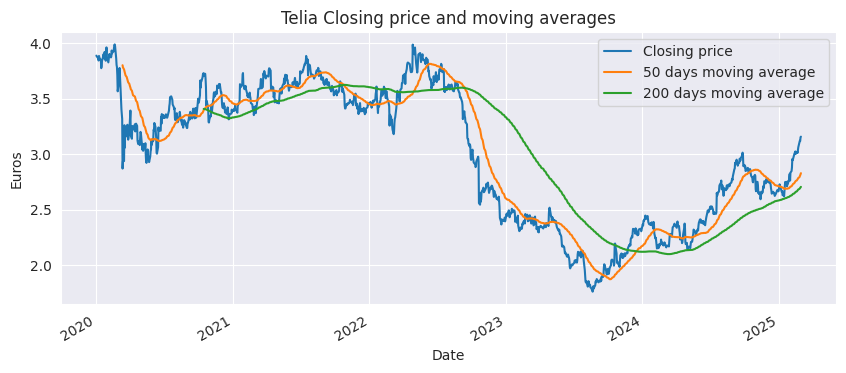

In [12]:
### Consider Telia's stock markets and daily closing values

ax = (telia['Close']).plot(figsize=(10,4), title = 'Telia Closing price and moving averages', ylabel = 'Euros')

### Add 50 and 200 days moving averages to the line chart

telia['Close'].rolling(50).mean().plot(ax = ax)
telia['Close'].rolling(200).mean().plot(ax = ax)

## Add legend and axis title

ax.legend(['Closing price', '50 days moving average', '200 days moving average'])



How would you analyze the development of the stock price? Can you identify any signs of golden cross or death cross? If so, what would be the menaing of the found cross? See, e.g. <a href="https://www.investopedia.com/ask/answers/121114/what-difference-between-golden-cross-and-death-cross-pattern.asp">Investopedia's article</a> about this for more information.

## Percentages of changes

It's convinient to calculate percentages of changes using the function **pct_change()**.

In [13]:
### Changes of stock prices from the previous day as percentages

elisa['Elisa-daily%'] = elisa['Close'].pct_change()
telia['Telia-daily%'] = telia['Close'].pct_change()

In [14]:
### Dataframes elisa and telia now have a new column
elisa

Price,Adj Close,Close,High,Low,Open,Volume,Elisa-daily%
Ticker,ELISA.HE,ELISA.HE,ELISA.HE,ELISA.HE,ELISA.HE,ELISA.HE,
Date,,,,,,,
2020-01-02,40.400951,49.279999,49.520000,49.160000,49.250000,194976,NaN
2020-01-03,40.810863,49.779999,50.040001,49.290001,49.400002,335732,0.010146
2020-01-07,40.696091,49.639999,50.299999,49.450001,49.880001,452005,-0.002812
2020-01-08,40.425549,49.310001,49.630001,49.160000,49.500000,365059,-0.006648
2020-01-09,40.728886,49.680000,49.930000,49.419998,49.430000,622106,0.007504
...,...,...,...,...,...,...,...
2025-02-24,44.080002,44.080002,44.099998,42.820000,42.880001,309015,0.027985
2025-02-25,44.160000,44.160000,44.279999,43.840000,44.080002,206274,0.001815


**Logarithmic changes**

Profits and returns are often calculted using their logarithmic counterpart. Logarithmic changes are calculated by dividing the price of the day by the price of the previous day and taking the natural logarithm of the result. If the daily changes are not large, as is usually the case with daily returns, also logarithmic changes are not large and in such cases they also are very different from daily changes.

When we consider yield percentages, logarithmic returns have two advantages:
* Logarithmic returns follow normal distribution better than daily returns. This is useful for statistical analysis.
* Logarithmic returns are additive. In general, the sum of the rates of return of successive periods is not equal to the total rate of return of the periods. For example, the total rate of return corresponding to two successive 10% returns is 21%. However, the sum of consecutive logarithmic returns is equal to the logarithmic total return of the periods.


Logarithmic returns can be calculated by replacing the code in the previous cell with the next one:

<code>
from numpy import log
</code><br />
<code>
elisa['Elisa-daily%'] = log(elisa['Close'].pct_change() + 1)
</code><br />
<code>
telia['Telia-daily%'] = log(telia['Close'].pct_change() + 1)
</code>

In [15]:
### Next add percentage changes into a same dataframe

changes = pd.concat([elisa['Elisa-daily%'], telia['Telia-daily%']], axis = 1)

### In case there are missing values in closing prices (no sales is done), that results in missing values in percentages of changes as well.
### These missing values can be replaced by a zero percentage of change using the function fillna as follows:

changes = changes.fillna(0)

### See the result

changes


,Elisa-daily%,Telia-daily%
Date,,
2020-01-02,0.000000,0.000000
2020-01-03,0.010146,-0.001544
2020-01-07,-0.002812,-0.005155
2020-01-08,-0.006648,-0.004663
2020-01-09,0.007504,0.010671
...,...,...
2025-02-24,0.027985,0.014696
2025-02-25,0.001815,0.004184
2025-02-26,0.002264,-0.000961


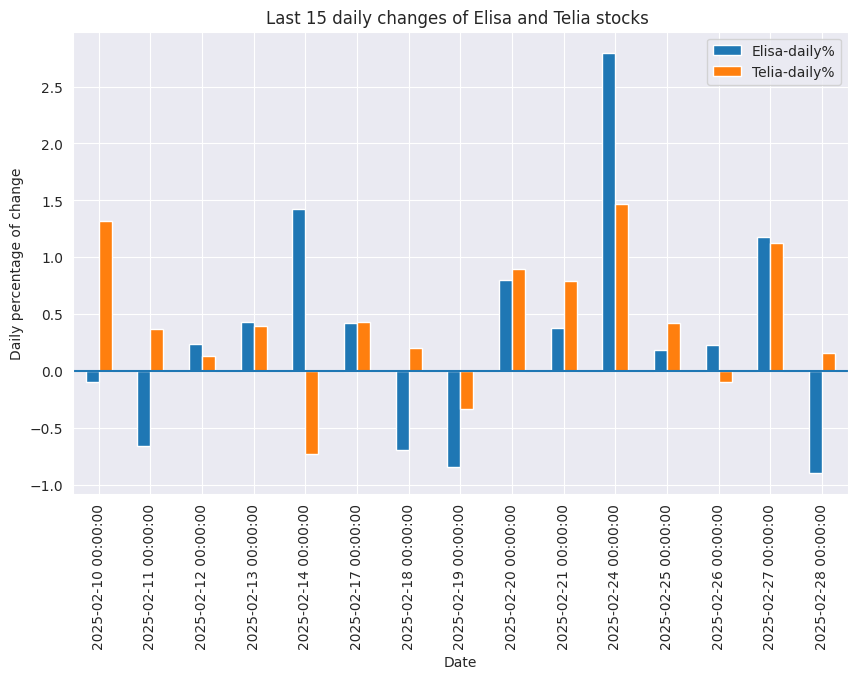

In [16]:
### Display the last 15 changes

(changes[-15:]*100).plot.bar(figsize=(10, 6))

### Vertical axis title
plt.ylabel('Daily percentage of change')

### Add a horisontal line at zero

plt.title('Last 15 daily changes of Elisa and Telia stocks ')

plt.axhline()

In [17]:
### Statistical numbers for percentages of changes

(changes*100).describe().round(2)

,Elisa-daily%,Telia-daily%
count,1300.00,1300.00
mean,0.00,-0.00
std,1.29,1.51
min,-8.41,-13.45
25%,-0.59,-0.72
50%,0.04,0.04
75%,0.66,0.74
max,16.40,11.00


<Axes: >

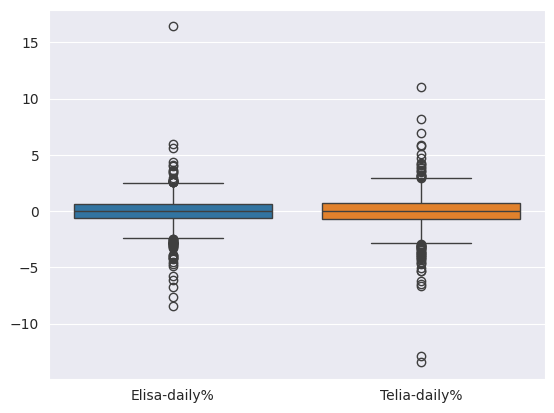

In [18]:
### comparison of percentages of change graphically;

sns.boxplot(data = changes*100)

Next we find the days when the percentage of change has been greater than six per cent.

In [19]:

changes[(abs(changes['Elisa-daily%']) > 0.06) | (abs(changes['Telia-daily%']) > 0.06)]

,Elisa-daily%,Telia-daily%
Date,,
2020-03-09,-0.040785,-0.064356
2020-03-12,-0.084077,-0.134499
2020-03-17,0.164016,0.109976
2020-03-18,0.055873,-0.061963
2020-04-03,-0.076739,-0.066333
2020-10-16,-0.061020,0.005671
2022-10-21,-0.018935,-0.128406
2023-10-19,-0.067709,0.082260
2024-07-18,0.011945,0.069383


## Correlation between percentages of changes

Percentages of changes of Elisa and Telia have a positive correlation.

In [20]:
### Calculate correlations

changes.corr()

,Elisa-daily%,Telia-daily%
Elisa-daily%,1.000000,0.480193
Telia-daily%,0.480193,1.000000


<Axes: xlabel='Elisa-daily%', ylabel='Telia-daily%'>

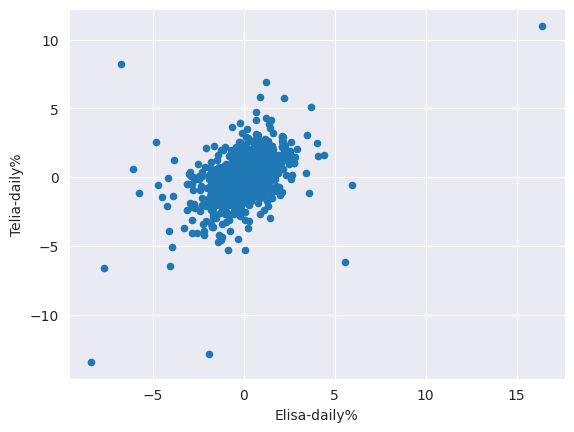

In [21]:
### Positive correlation between percentages of changes can be seen in the scatter chart

(changes*100).plot.scatter(x = 'Elisa-daily%', y = 'Telia-daily%')

<Axes: xlabel='Date'>

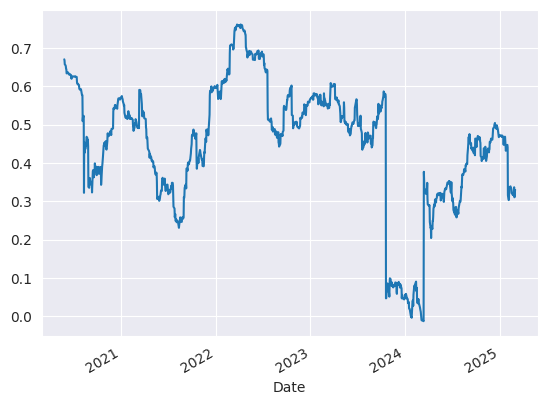

In [22]:
### Moving correlation describes how percentages of changes correlate at different times

changes['Elisa-daily%'].rolling(100).corr(changes['Telia-daily%']).plot()

## Moving volatility

Volatility describes the overall risk of a stock. It is announced as annual if the observation period is at least one year.

When calculating volatility standard deviation (std()) of percentage numbers of daily changes is determined and then it is transform to be annual when the deviation is multiplied by a square root of a factor that depends on the ratio of observation and destination data. In the following example this factor is assumed to be 254.

Moving volatility describes how volatility (i.e., risk) has changed over the time.

<Axes: xlabel='Date'>

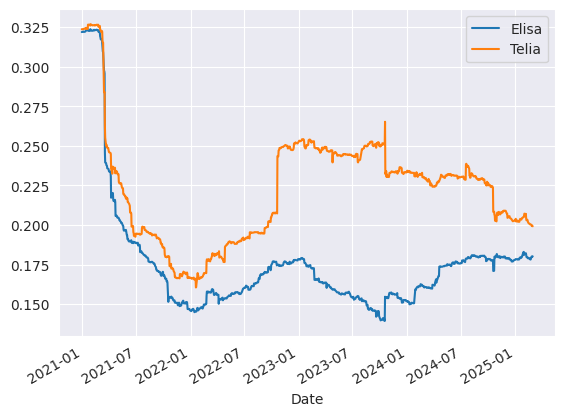

In [23]:
### Examples of moving volatility of 252 days

### Elisa stock
(changes['Elisa-daily%'].rolling(252).std() * (254**0.5)).plot(label = 'Elisa', legend = True)

### Telia stock
(changes['Telia-daily%'].rolling(252).std() * (254**0.5)).plot(label = 'Telia', legend = True)

## Line charts with two axis

Elisa and Telia stock prices are of different order. They can be drawn in one chart if two axes are used.

Text(0.5, 1.0, 'Elisa and Telia share prices development')

<Figure size 1000x600 with 0 Axes>

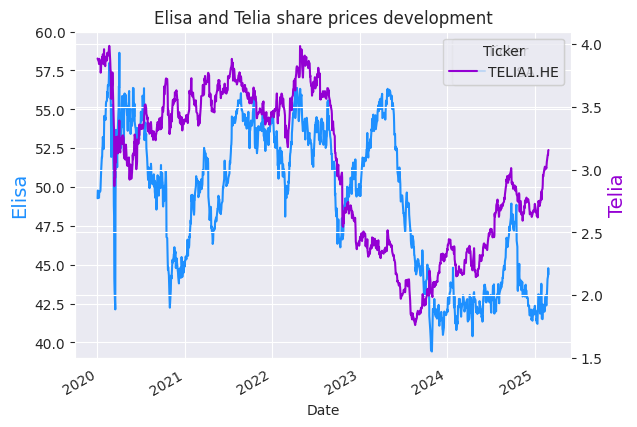

In [24]:
### Figure size

plt.figure(figsize=(10,6))

### Line chart of Elisa stocks closing prices.

axe = elisa['Close'].plot(color = 'dodgerblue')

### Add name for Elisa, colour and font size.

plt.ylabel('Elisa', color = 'dodgerblue', fontsize = 14)

### Scale the value axis of Elisa

plt.ylim(39, 60)

### Next we create another axes object (called axt) and determine it to have a common x-axis with the object axe.

axt = axe.twinx()

### Line chart of Telia stock closing prices

telia['Close'].plot(ax = axt, color ='darkviolet')

### Add name for Telia, colour and font size.

plt.ylabel('Telia', color = 'darkviolet', fontsize = 14)

### Scale the value axis of Telia

plt.ylim(1.5, 4.1)

### Chart title

plt.title('Elisa and Telia share prices development')


## Is there a connection between weekdays and profit rate?

In [25]:
### Add weekdays to a column of their own (zero = Monday)

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

changes['Weekday'] = changes.index.weekday

### Elisa's statistical numbers by weekdays

elisa_weekday = changes.groupby('Weekday')['Elisa-daily%'].describe()
elisa_weekday.index = weekdays

elisa_weekday

,count,mean,std,min,25%,50%,75%,max
Mon,257.0,0.000840,0.011574,-0.045079,-0.005576,0.001819,0.006874,0.034265
Tue,265.0,0.000266,0.015096,-0.057626,-0.006078,0.000384,0.006266,0.164016
Wed,264.0,0.000448,0.011440,-0.038680,-0.005108,-0.000226,0.006183,0.059656
Thu,261.0,-0.001023,0.012520,-0.084077,-0.006967,-0.000371,0.006266,0.040085
Fri,253.0,-0.000533,0.013502,-0.076739,-0.005273,0.000884,0.006905,0.043967


In [26]:
### Telia's statistical numbers by weekdays

telia_weekday = changes.groupby('Weekday')['Telia-daily%'].describe()
telia_weekday.index = weekdays

telia_weekday

,count,mean,std,min,25%,50%,75%,max
Mon,257.0,0.000493,0.013308,-0.064356,-0.006463,0.001894,0.008327,0.041424
Tue,265.0,0.000865,0.014499,-0.044921,-0.006817,0.000256,0.007392,0.109976
Wed,264.0,-0.000079,0.014705,-0.061963,-0.007468,-0.000822,0.007156,0.058433
Thu,261.0,-0.000478,0.017286,-0.134499,-0.007692,0.000279,0.007365,0.082260
Fri,253.0,-0.001064,0.015221,-0.128406,-0.007275,0.000279,0.006875,0.031508


How would you answer to the question raised above, based on these figures?

Next we perform statistical tests whether there are statistically significances difference between percentages of changes of certain days.

In [27]:
### First test is applied to percentages of change of Elisa shares
### Test whether there is statistically significant difference between Monday and Thursday

### Form the groups to be compared

earlier_day = changes['Elisa-daily%'][changes['Weekday']==0]
later_day = changes['Elisa-daily%'][changes['Weekday']==3]

# T-test of two independent (ind) samples
from scipy.stats import ttest_ind
ttest_ind(earlier_day, later_day, equal_var=False, nan_policy='omit')

TtestResult(statistic=1.7594507333647198, pvalue=0.07909590785313982, df=513.962340305002)

In [28]:
### The second test is applied to percentages of change of Telia shares
### Test whether there is statistically significant difference between Tuesday and Thursday

### Form the groups to be compared

earlier_day = changes['Telia-daily%'][changes['Weekday']==1]
later_day = changes['Telia-daily%'][changes['Weekday']==3]

# T-test of two independent (ind) samples
from scipy.stats import ttest_ind
ttest_ind(earlier_day, later_day, equal_var=False, nan_policy='omit')

TtestResult(statistic=0.9645266408355738, pvalue=0.33524276336295444, df=505.91859460151255)

How would you comment the questions about statistically significance raised above, based on these calculations?

Source and origin of inspiration:<br />
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>

In [29]:
import datetime
import pytz

tz = pytz.timezone('Europe/Helsinki')
print(f'Last modified {tz.localize(datetime.datetime.now()):%Y-%m-%d %H:%M} by Juha Nurmonen')

Last modified 2025-02-28 09:52 by Juha Nurmonen
